In [1]:
import ejercicio2 as ej
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
plt.style.use('default')
from IPython.display import HTML

In [2]:
dt = 1
dx = 2

In [3]:
lam, T0 = ej.init(dt, dx)

In [4]:
lam

0.20875

se detiene propagacion temporal en i = 74


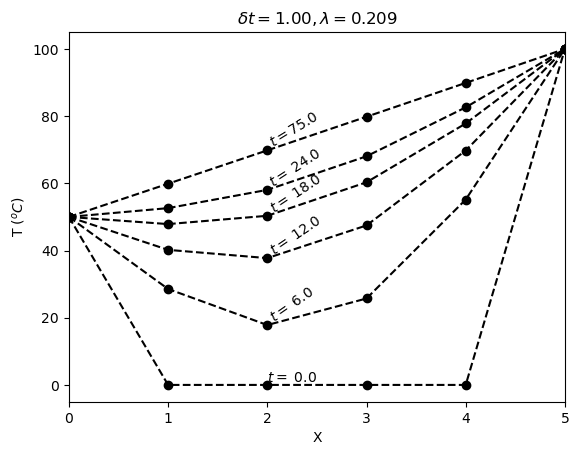

In [5]:
file1, file2, file3 = ej.resolv_explicito(lam, T0)
ej.plotlistT(file1, dt, lam, dx=dx)

In [6]:
filecn1, filecn2, filecn3 = ej.resolv_CN(lam, T0)
# ej.plotlistT(filecn1, dt, lam)

se detiene propagacion temporal en i = 77


In [7]:
T = np.loadtxt(file1)
F = np.loadtxt(file2)

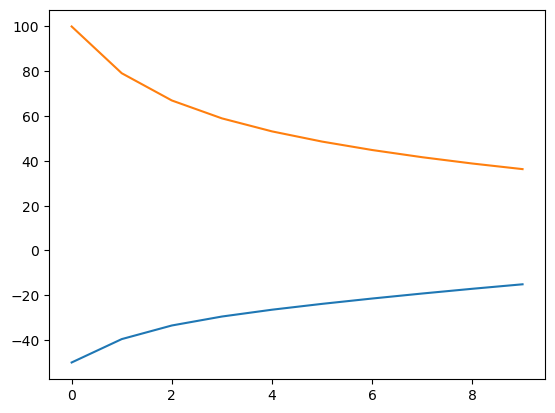

In [8]:
plt.plot(list(range(10)),F[:10,0])
plt.plot(list(range(10)),F[:10,-1])

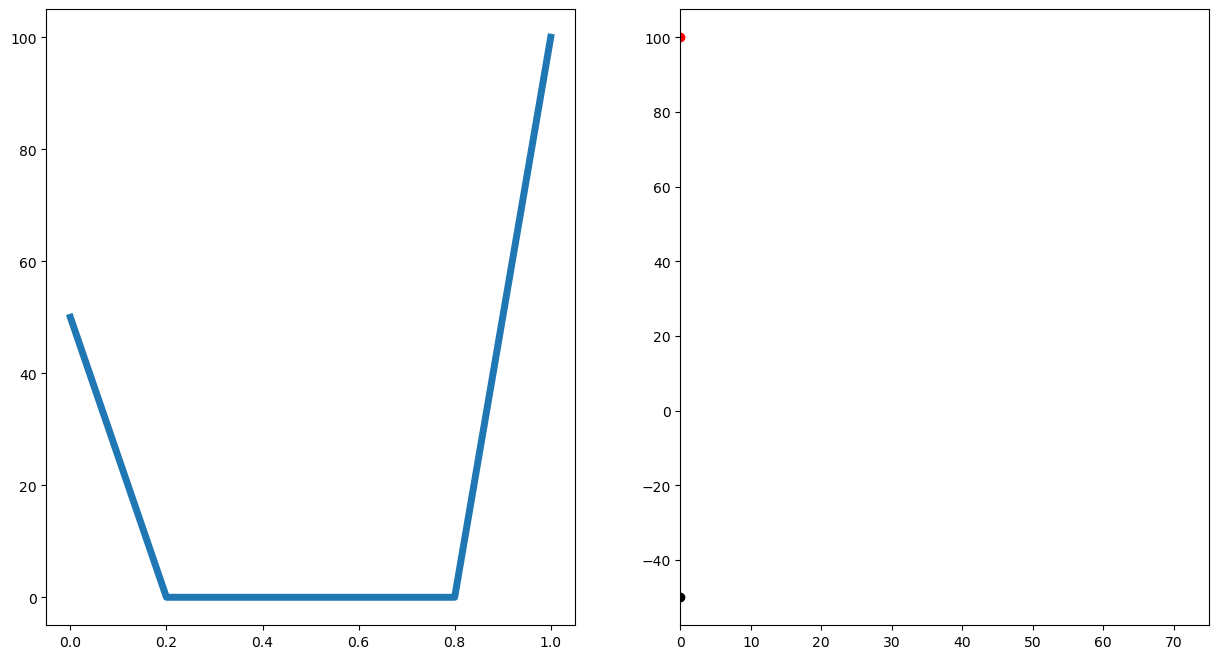

In [20]:
#fig = plt.figure()
#ax = plt.axes() # subplots(1,1)
fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[1].set_xlim([0, F.shape[0]])
x = np.linspace(0,1, T.shape[1])
line1,  = ax[0].plot(x,T[0], lw=5) 
line2, = ax[1].plot([0],F[0,0], 'ok', lw=5)
line3, = ax[1].plot([0],F[0,-1], 'or', lw=5)
line = [line1, line2, line3]

def updatelines(i, T, F):
    line[0].set_data(x,T)
    line[1].set_data(list(range(i)),F[:i,0])
    line[2].set_data(list(range(i)),F[:i,-1])
    return line

animation = FuncAnimation(fig, updatelines, fargs=(T,F,), frames = T.shape[0], interval=50 ) #, blit=True, repeat=True)

animation.save('example.mp4')

In [22]:
HTML(animation.to_html5_video())

ValueError: shape mismatch: objects cannot be broadcast to a single shape